# Spatial Inequality Analysis

## Introduction

At the time this is being written, the topic of inequality is at the top of agenda of policy makers and is drawing considerable attention in academic circles. This is due to historic levels of inequality across the globe (references).

why is this important

In this chapter, we examine how a spatially explicit focus can provide insights on inequality and its dynamics. We focus on the case of the United States over the period since 1969. 

- why inequality
- Regions are given here
- Internal versus external homogeneity
- Concentration versus composition
- organization of chapter

---

In [1]:
%matplotlib inline

import seaborn
import pandas
import geopandas
import pysal
import numpy
import mapclassify
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

## Data

We begin with an exploration of the dataset `usincome_final.shp` which reports personal income data for
counties in the United States annually from 1969-2017. 

In [2]:

gdf = geopandas.read_file('../data/inequality/usincome_final.shp')
gdf.head()


,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,LineCode,METDIVFP,MTFCC,NAME,NAMELSAD,Region,STATEFP,TableName,Unit,geometry
0,148926,154820,164182,177909,200349,208954,232188,250796,285130,317742,...,1,None,G4020,Sauk,Sauk County,3,55,CAINC1,Thousands of dollars,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
1,38212,39021,39247,40037,40867,41030,42132,42114,42490,42491,...,2,None,G4020,Sauk,Sauk County,3,55,CAINC1,Number of persons,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
2,3897,3968,4183,4444,4902,5093,5511,5955,6711,7478,...,3,None,G4020,Sauk,Sauk County,3,55,CAINC1,Dollars,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
3,91916,100258,106854,116383,132623,143709,155120,173709,198952,221278,...,1,None,G4020,Pierce,Pierce County,3,55,CAINC1,Thousands of dollars,"POLYGON ((-92.694542 44.68874, -92.694659 44.6..."
4,26277,26865,27818,28406,28683,28815,29272,29764,30474,30450,...,2,None,G4020,Pierce,Pierce County,3,55,CAINC1,Number of persons,"POLYGON ((-92.694542 44.68874, -92.694659 44.6..."


Inspection of the head of the data frame reveals that the years appear as columns in the data set, together with information about the particular record.
This format is an example of a [*wide* longitudinal data set](https://www.theanalysisfactor.com/wide-and-long-data/).


In [4]:
gdf[['LineCode', 'Descriptio']].head()


,LineCode,Descriptio
0,1,Personal income (thousands of dollars)
1,2,Population (persons) 1/
2,3,Per capita personal income (dollars) 2/
3,1,Personal income (thousands of dollars)
4,2,Population (persons) 1/


In [5]:
pci_df = gdf[gdf.LineCode == 3]

In [6]:
pci_df.head()

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,LineCode,METDIVFP,MTFCC,NAME,NAMELSAD,Region,STATEFP,TableName,Unit,geometry
2,3897,3968,4183,4444,4902,5093,5511,5955,6711,7478,...,3,None,G4020,Sauk,Sauk County,3,55,CAINC1,Dollars,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
5,3498,3732,3841,4097,4624,4987,5299,5836,6529,7267,...,3,None,G4020,Pierce,Pierce County,3,55,CAINC1,Dollars,"POLYGON ((-92.694542 44.68874, -92.694659 44.6..."
8,3335,3604,3870,4218,4670,5108,5509,6318,6873,7443,...,3,None,G4020,La Crosse,La Crosse County,3,55,CAINC1,Dollars,"POLYGON ((-91.347741 43.911964, -91.348743 43...."
11,2740,2953,3275,3482,4014,4335,4733,5169,5885,6323,...,3,None,G4020,Dunn,Dunn County,3,55,CAINC1,Dollars,"POLYGON ((-92.135379 44.944807, -92.135378 44...."
14,2711,2936,3289,3720,4214,4588,4923,5512,6067,6383,...,3,None,G4020,Jackson,Jackson County,3,55,CAINC1,Dollars,"POLYGON ((-91.166006 44.335102, -91.166004 44...."


In [7]:
pci_df.shape

(3077, 76)

In [10]:
pci_df[['1969', 'STATEFP', 'COUNTYFP', 'geometry']].head()

,1969,STATEFP,COUNTYFP,geometry
2,3897,55,111,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
5,3498,55,093,"POLYGON ((-92.694542 44.68874, -92.694659 44.6..."
8,3335,55,063,"POLYGON ((-91.347741 43.911964, -91.348743 43...."
11,2740,55,033,"POLYGON ((-92.135379 44.944807, -92.135378 44...."
14,2711,55,053,"POLYGON ((-91.166006 44.335102, -91.166004 44...."


## Global Inequality
We begin our examination of inequality by focusing on several global measures. Here, global means the measure is concerned with the overall, or a-spatial, nature of inequality. Several classic measures of inequality are available for this purpose.

In general terms, measures of inequality focus on the dispersion present in an income distribution. In the case of regional, or spatial, inequality the distributions are defined on average or per-capita incomes for a spatial unit, such as a county, census tract, or region. For the US counties, we can visualize the distribution of per capita incomes for the first year in the sample as follows:



To get a sense for the value distribution for per capita income, we can first discretize the distribution:

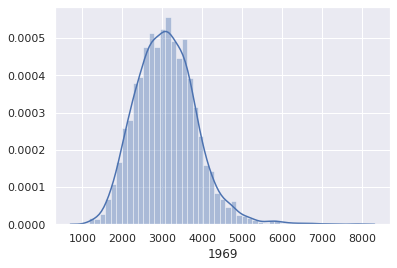

In [19]:
import seaborn  as sns
sns.set()
sns.distplot(pci_df['1969'])


- long upper tail
- morphology
- nominal v real

The long right tail is a prominent feature of the distribution, and is common in the study of incomes. A key point to keep in mind here is that the unit of measurement in this data is a spatial aggregate - a county. By contrast, in the wider inequality literature the observational unit is typically a household or individual. In the latter distributions, the degree of skewness is often more pronounced. (Say something about averaging effect for regional distributions).

The density is a powerful summary device that captures the overall morphology of the *value* distribution. At the same time, the density is silent on the underlying *spatial distribution* of county incomes. We can look at this second view of the distribution using a choropleth map:

In [20]:
from pysal.viz import mapclassify

In [21]:
q5_1969 = mapclassify.Quantiles(pci_1969['1969'])
q5_1969

                  Quantiles                  
 
 Lower              Upper               Count
           x[i] <= 2445.200               616
2445.200 < x[i] <= 2864.400               615
2864.400 < x[i] <= 3246.600               615
3246.600 < x[i] <= 3672.800               615
3672.800 < x[i] <= 7841.000               616

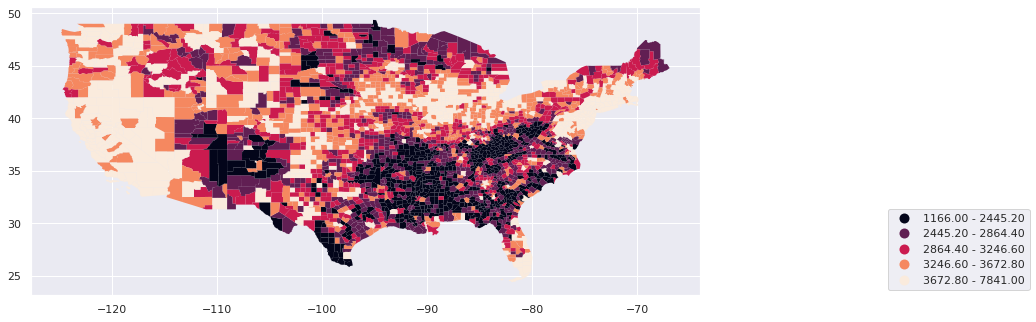

In [54]:
_= pci_1969.plot(column='1969', scheme='Quantiles', legend=True,
                 edgecolor='none',
             legend_kwds={'loc': 'lower right',
                         'bbox_to_anchor':(1.5, 0.0)}, figsize=(12, 12))

The choropleth and the kernel density provide different visual depictions of the distribution of county incomes. These are useful for developing an understanding of the overall  To gain more specific insights on the level of inequality in the distribution, we turn to a number of inequality inices.

### 20:20 Ratio

One commonly used measure of inequality in a distribution is the so called 20:20 ratio, which is defined as the ratio of the incomes at the 80th percentile over that at the 20th percentile: 

In [23]:
q5_1969.bins

array([2445.2, 2864.4, 3246.6, 3672.8, 7841. ])

In [24]:
i_20_20 = q5_1969.bins[-2]/q5_1969.bins[0]
i_20_20

1.5020448225094063

In 1969 the richest 20% of the counties had an income that was 1.5 times the poorest 20% of the counties. The 20:20 ratio has the advantage of being robust to outliers on the top and the bottom of the distribution. 

We can examine the dynamics of this global inequality measure by creating a simple function to apply to all years in our time series:

In [25]:
def ineq_2020(values):
    q5 = mapclassify.Quantiles(values)
    return q5.bins[-2]/q5.bins[0]
    
    

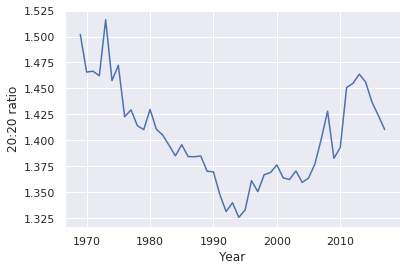

In [26]:
years = list(range(1969, 2018))
i_20_20_all = numpy.array([ ineq_2020(pci_df[str(year)]) for year in years])
_ = plt.plot(years, i_20_20_all)
_ = plt.ylabel("20:20 ratio")
_ = plt.xlabel("Year")



The ratio has a U-shaped pattern over time, bottoming out around 1994 after a long secular decline in the early period. Post 1994, however, the trend is one of increasing inequality up until 2013 where there is a turn towards lower income inequality between the counties.


For other classic measures of inequality, we will use the `inequality` package from `pysal`:

In [27]:
from pysal.explore import inequality

### Gini Index

- Lorenz Curve

In [58]:
y = pci_df.sort_values(by=['1969'])['1969']

In [76]:
Fy = (y / y.sum()).cumsum()

In [77]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [78]:
n = y.shape[0]
Fn = np.arange(1, n+1)/n

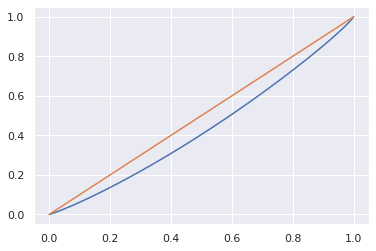

In [96]:
f, ax = plt.subplots()
ax.plot(Fn,Fy)
ax.plot(Fn, Fn)
#plt.xlim(0, 1.0)

In [86]:
y[0:10]

7943    1166
236     1242
8948    1244
3143    1253
2921    1293
2888    1296
3032    1299
3086    1337
2918    1338
2924    1358
Name: 1969, dtype: int64

In [87]:
y.max()/y.min()

6.724699828473414

In [88]:
ytot = y.sum()

In [89]:
ytot

9522438

In [91]:
y[0,:]/ytot > 1/n

ValueError: Can only tuple-index with a MultiIndex

In [93]:
Fy[0:3]

7943    0.000122
236     0.000253
8948    0.000384
Name: 1969, dtype: float64

In [94]:
Fn[0:3]

array([0.00032499, 0.00064998, 0.00097498])

In [95]:
Fn > Fy

7943     True
236      True
8948     True
3143     True
2921     True
        ...  
5132     True
7985     True
8705     True
7901     True
5408    False
Name: 1969, Length: 3077, dtype: bool

In [28]:
g69 = inequality.gini.Gini(pci_1969['1969'].values)


In [29]:
g69.g

0.13553708123000455

In [30]:
years = [str(y) for y in range(1969, 2018)]
ginis = numpy.array([inequality.gini.Gini(pci_df[year].values).g for year in years])
years = numpy.array([int(y) for y in years])

In [31]:
gini_df = pandas.DataFrame(data = numpy.hstack([[years, ginis]]).T, columns=['Year', 'Gini'])
gini_df['Year'] = gini_df['Year'].astype(int)
gini_df.head()

,Year,Gini
0,1969,0.135537
1,1970,0.130055
2,1971,0.128522
3,1972,0.129104
4,1973,0.142146


In [32]:
gini_df.index = pandas.to_datetime(gini_df['Year'], format="%Y")
gini_df = gini_df.drop(columns=["Year"])

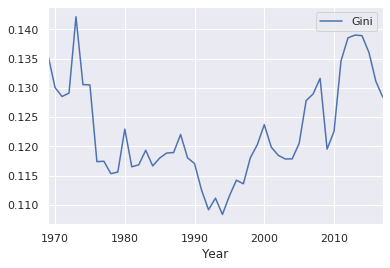

In [33]:
gini_df.plot(y=["Gini"])

In [34]:
gini_df['T'] = [inequality.theil.Theil(pci_df[str(y)]).T for y in years]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33b0dac748>,
      dtype=object)

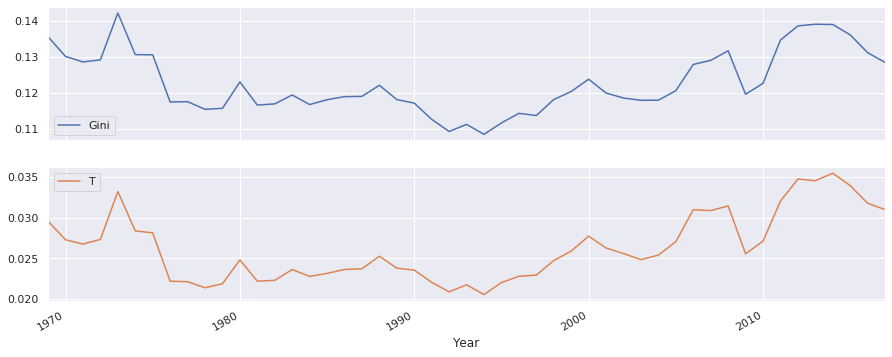

In [35]:
#gini_df.plot(figsize=(15,4))
gini_df.plot(subplots=True, figsize=(15,6))
#gini_df.plot(y=['Gini', 'T'], figsize=(15,4))

## Spatial Inequality

### Spatial Autocorrelation

In [36]:
wq = pysal.lib.weights.Queen.from_dataframe(pci_df)

In [37]:
wq.n

3077

In [38]:
MI = [pysal.explore.esda.moran.Moran(pci_df[str(y)], wq) for y in years]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33b0b57978>,
      dtype=object)

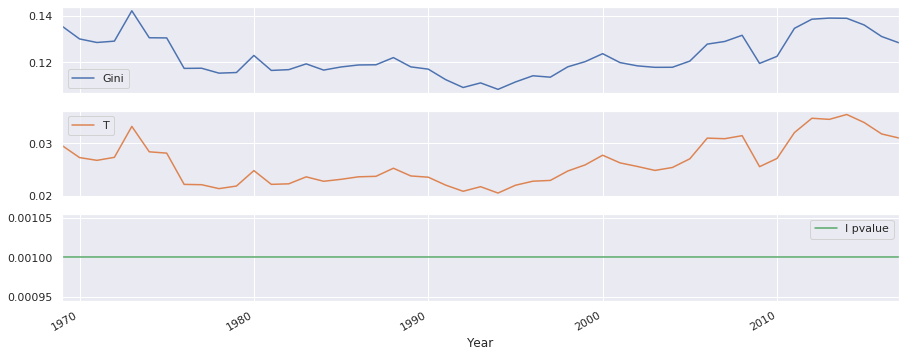

In [39]:
pvalues = [ mi.p_sim for mi in MI]
res_df = gini_df
res_df['I pvalue'] = pvalues
res_df.plot(subplots=True, figsize=(15,6))

### Spatializing Classic Measures

### Spatial 20:20


In [40]:
ranks = pci_df.rank()

In [41]:
for year in years:
    pci_df["{}_rank".format(year)] = pci_df[str(year)].rank(method='first')

In [42]:
ridx_20 = int(.2 * 3077)
ridx_80 = int(.8 * 3077)
ridx_20, ridx_80

(615, 2461)

In [43]:
df = pci_df
df['1969_rank']

2       2691.0
5       2209.0
8       1972.0
11      1040.0
14       992.0
         ...  
9218    1599.0
9221    3020.0
9224     635.0
9227    1925.0
9230    2849.0
Name: 1969_rank, Length: 3077, dtype: float64

In [32]:
df[df['1969_rank']==615]

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008_rank,2009_rank,2010_rank,2011_rank,2012_rank,2013_rank,2014_rank,2015_rank,2016_rank,2017_rank
8999,2444,2562,2719,3015,3241,3665,4208,4881,5581,6407,...,572.0,581.0,435.0,341.0,252.0,182.0,249.0,274.0,328.0,261.0


In [33]:
df.index[df['1969_rank']==615].tolist()

[8999]

In [44]:
idx_20 = []
idx_80 = []
for year in years:
    column = "{}_rank".format(year)
    idx_20_i = df.index[df[column]==ridx_20]
    idx_20.extend(idx_20_i)
    idx_80_i = df.index[df[column]==ridx_80]
    idx_80.extend(idx_80_i)

In [35]:
len(idx_20)

49

In [36]:
len(years)

49

In [37]:
idx_20[0], idx_80[0]

(8999, 2561)

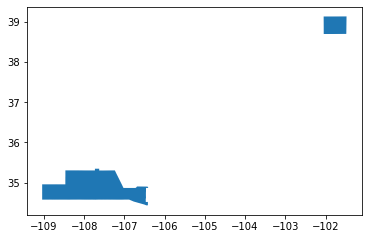

In [38]:
df.loc[[8999, 2561], :].plot()

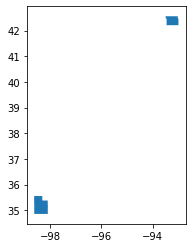

In [39]:
df.loc[[idx_20[-1], idx_80[-1]], :].plot()

In [45]:
import geopandas as gpd
from shapely.geometry import Point,Polygon
geom=[Point(xy) for xy in zip([117.454361,117.459880],[38.8459879,38.846255])]
ldf=gpd.GeoDataFrame(geometry=geom,crs={'init':'epsg:4326'})
ldf.to_crs(epsg=3310,inplace=True)
l=gdf.distance(ldf.shift())
print(l)

0                NaN
1       9.956791e+06
2                NaN
3                NaN
4                NaN
            ...     
9226             NaN
9227             NaN
9228             NaN
9229             NaN
9230             NaN
Length: 9231, dtype: float64


In [43]:
ldf = df.to_crs({'init':'epsg:4326'})

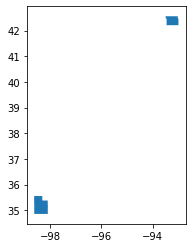

In [44]:
ldf.loc[[idx_20[-1], idx_80[-1]], :].plot()

In [45]:
ldf.to_crs(epsg=3310,inplace=True)


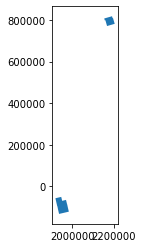

In [46]:
ldf.loc[[idx_20[-1], idx_80[-1]], :].plot()

In [47]:
small = ldf.loc[[idx_20[-1], idx_80[-1]], :]

In [48]:
small

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008_rank,2009_rank,2010_rank,2011_rank,2012_rank,2013_rank,2014_rank,2015_rank,2016_rank,2017_rank
6203,2524,2822,2889,3272,4291,4187,4692,4866,4838,5573,...,443.0,368.0,413.0,565.0,677.0,793.0,911.0,671.0,336.0,615.0
2408,3857,4191,4002,4543,5992,6032,6548,6748,7088,8623,...,2648.0,2470.0,2523.0,2691.0,2725.0,2641.0,2607.0,2543.0,2387.0,2461.0


In [49]:
small.distance(small.shift()).values[-1]

850261.9196986001

In [50]:
small.geometry.centroid

6203    POINT (1951075.651540128 -92377.34360965305)
2408     POINT (2180153.890714678 794694.7258680048)
dtype: object

In [51]:
idxs = zip(idx_20, idx_80)
distances = []
for idx in idxs:
    o,d = idx
    #print(o,d, idx)
    pair = df.loc[idx, :]
    d = pair.distance(pair.shift()).values[-1]
    distances.append(d)

In [52]:
distances

[5.793494382777284,
 14.11115326544592,
 23.2298009066525,
 40.11641752788748,
 20.914297628557865,
 15.407105868272607,
 15.062971646920277,
 5.211649001807871,
 6.775426703442077,
 20.44265510167664,
 26.634752051829775,
 12.073695525805052,
 19.652499316239574,
 30.230796317568768,
 8.64932110490182,
 17.265616788606682,
 19.71670513883587,
 5.524698660218939,
 11.600260332271942,
 5.087227637574814,
 9.801452050512967,
 21.28086269714102,
 6.908859229154765,
 2.6155873939000664,
 5.117607798677233,
 13.553946040774992,
 18.33894677181762,
 13.402089350099104,
 6.850039879449605,
 37.52152272031369,
 6.2350626620115,
 9.94556852242646,
 6.351398267403174,
 7.822608143168172,
 20.866735819375897,
 28.401936409641596,
 11.916935086505633,
 16.70377904984774,
 20.862802519703873,
 7.243244383111751,
 5.112943017199099,
 11.10901592550902,
 19.917613899026676,
 13.590977880673961,
 27.178095806423322,
 4.763282149202798,
 5.289851836809796,
 10.360359657532838,
 8.234454089168326]

In [48]:
idxs = zip(idx_20, idx_80)

len(distances), len(years), len(list(idxs))
gini_df['s_dist'] = numpy.array(distances)

NameError: name 'distances' is not defined

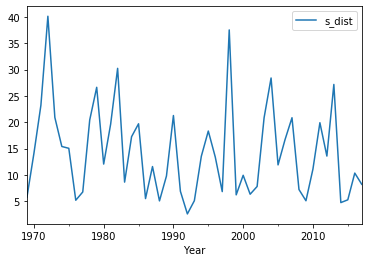

In [54]:
gini_df.plot(y=["s_dist"])

In [49]:
idxs = numpy.array(list(zip(idx_20, idx_80)))
idxs

array([[8999, 2561],
       [ 917, 5432],
       [4985,  794],
       [1058, 8312],
       [1001, 6992],
       [8660, 3941],
       [1397, 5000],
       [4502, 2054],
       [6725, 2003],
       [8066, 6602],
       [ 962, 4763],
       [8942, 4370],
       [1388, 9125],
       [8999, 6641],
       [1310, 1667],
       [3506, 3908],
       [4724, 4913],
       [6383, 2432],
       [1361,   20],
       [5927, 1304],
       [ 143, 2774],
       [4031, 8672],
       [ 524, 7865],
       [1901, 7079],
       [6179, 7952],
       [ 392, 2648],
       [4031, 5636],
       [3014, 4037],
       [ 293, 1775],
       [1460, 8291],
       [2897, 3701],
       [4874, 2468],
       [ 620, 1487],
       [4346,  146],
       [3695, 9065],
       [7934, 8339],
       [2666, 8570],
       [8939, 2267],
       [7067, 5882],
       [4967, 2411],
       [3689,  113],
       [4232, 4961],
       [ 539, 5312],
       [ 422, 8423],
       [ 743, 2846],
       [3170, 4472],
       [3104,  101],
       [6257,

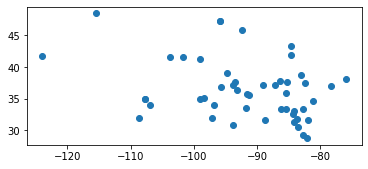

In [56]:
df.loc[idxs[:,0],:].centroid.plot()

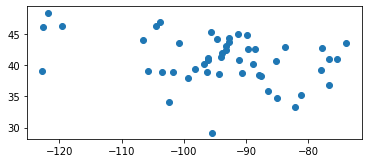

In [57]:
df.loc[idxs[:,1],:].centroid.plot()

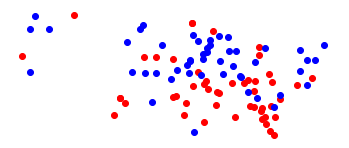

In [58]:

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
df.loc[idxs[:,0],:].centroid.plot(ax=ax, color='r')
df.loc[idxs[:,1],:].centroid.plot(ax=ax, color='b')
ax.set_axis_off()



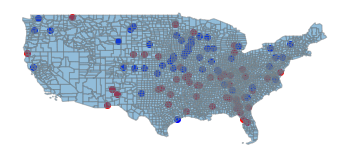

In [59]:

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
df.loc[idxs[:,0],:].centroid.plot(ax=ax, color='r')
df.loc[idxs[:,1],:].centroid.plot(ax=ax, color='b')
gdf.plot(ax=ax,edgecolor='gray', alpha=0.2)
ax.set_axis_off()



## Rank paths

In [46]:
from shapely.geometry import LineString

In [50]:
ls20 = geopandas.GeoSeries(LineString(df.loc[idxs[:,0],:].centroid.tolist()))
ls80 = geopandas.GeoSeries(LineString(df.loc[idxs[:,1],:].centroid.tolist()))

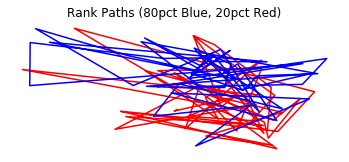

In [63]:

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
ls20.plot(ax=ax, color='r', label='20p')
ls80.plot(ax=ax, color='b')
#gdf.plot(ax=ax,edgecolor='gray', alpha=0.2)
plt.title('Rank Paths (80pct Blue, 20pct Red)')
ax.set_axis_off()



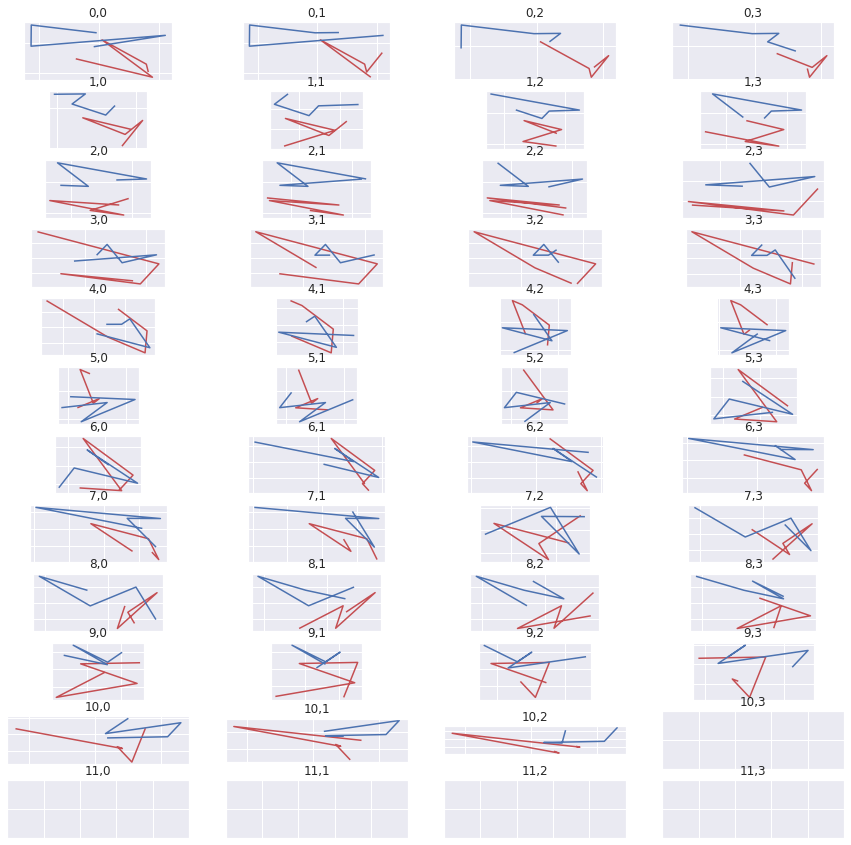

In [51]:
columns = 4
rows = 12
fig, ax_array = plt.subplots(rows, columns, squeeze=False, figsize=(15,15))
year=0
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        axes.set_title('{},{}'.format(i,j))
        axes.set_yticklabels([])
        axes.set_xticklabels([])
        if year < 43:
            ls20 = geopandas.GeoSeries(LineString(df.loc[idxs[:,0],:].centroid.tolist()[year:year+5]))
            ls20.plot(ax=axes, color='r', label='20p')
            ls80 = geopandas.GeoSeries(LineString(df.loc[idxs[:,1],:].centroid.tolist()[year:year+5]))
            ls80.plot(ax=axes, color='b', label='20p')
    
        year += 1
#         axes.plot(you_data_goes_here,'r-')
        #axes.set_aspect('equal')
plt.show()

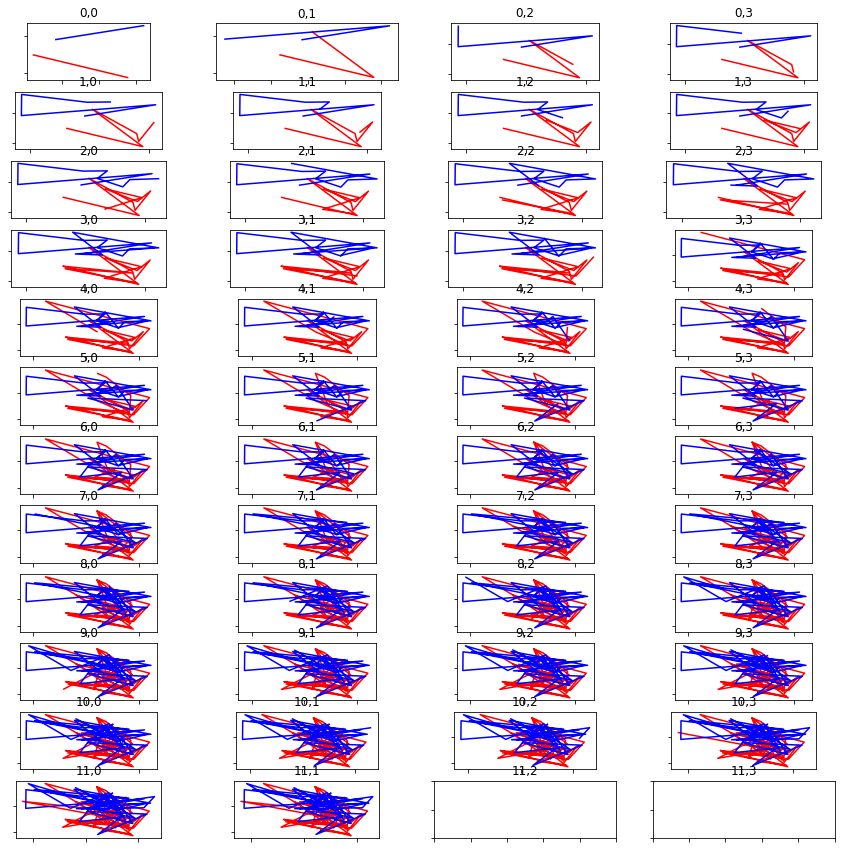

In [73]:
columns = 4
rows = 12
fig, ax_array = plt.subplots(rows, columns, squeeze=False, figsize=(15,15))
year=2
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        axes.set_title('{},{}'.format(i,j))
        axes.set_yticklabels([])
        axes.set_xticklabels([])
        if year < 48:
            ls20 = geopandas.GeoSeries(LineString(df.loc[idxs[:,0],:].centroid.tolist()[0:year]))
            ls20.plot(ax=axes, color='r', label='20p')
            ls80 = geopandas.GeoSeries(LineString(df.loc[idxs[:,1],:].centroid.tolist()[0:year]))
            ls80.plot(ax=axes, color='b', label='20p')
    
        year += 1
#         axes.plot(you_data_goes_here,'r-')
        #axes.set_aspect('equal')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


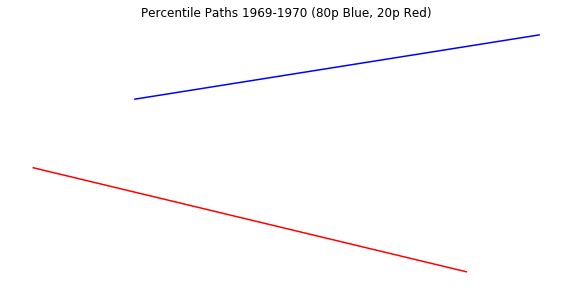

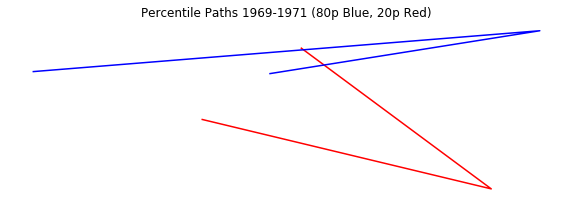

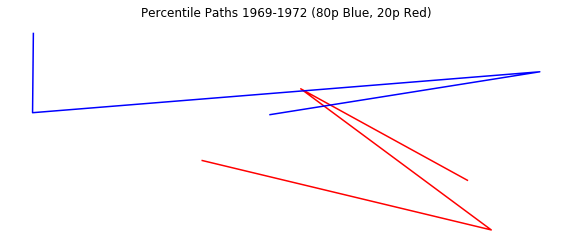

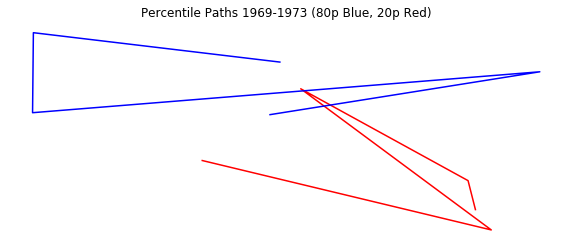

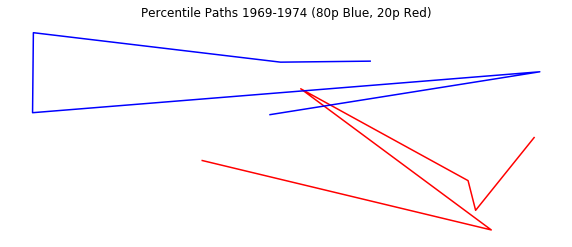

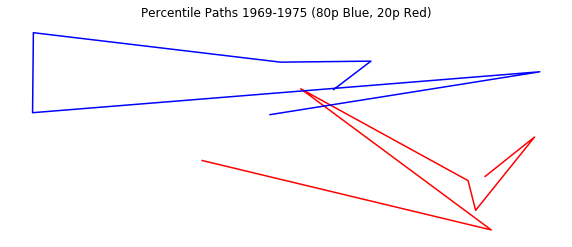

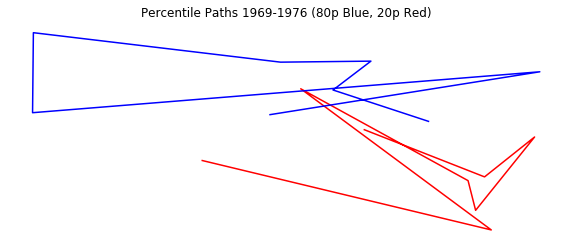

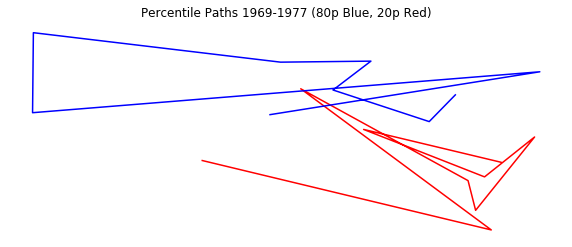

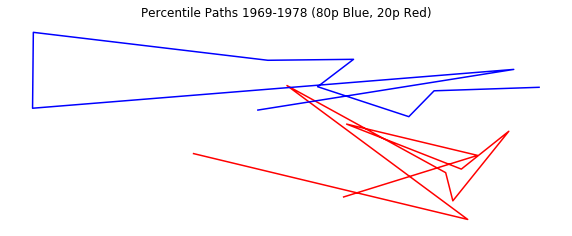

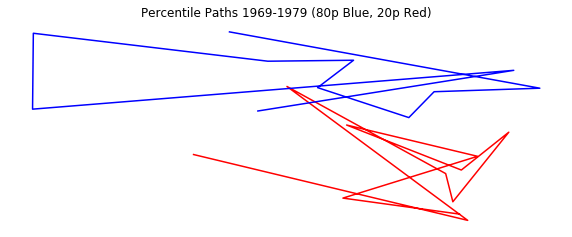

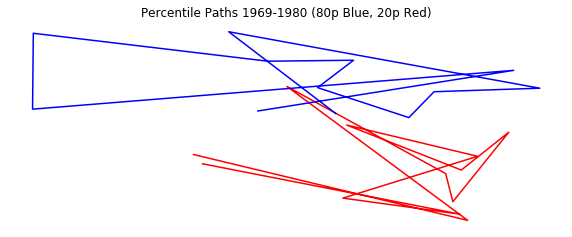

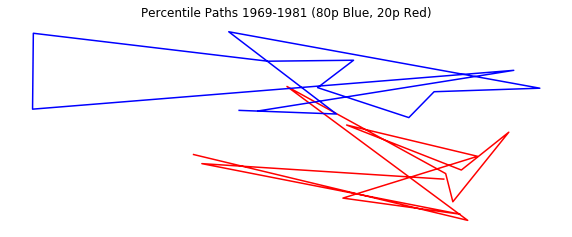

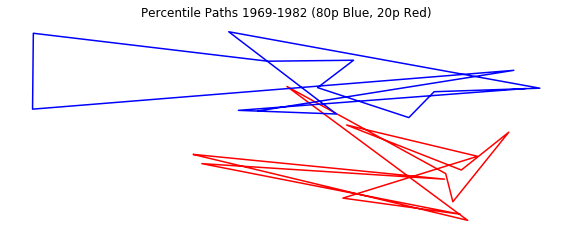

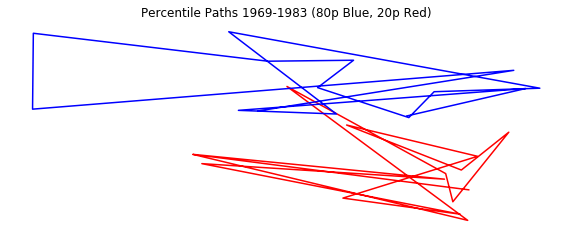

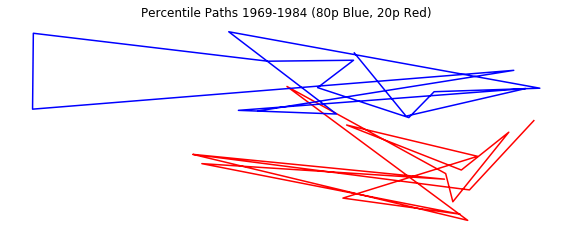

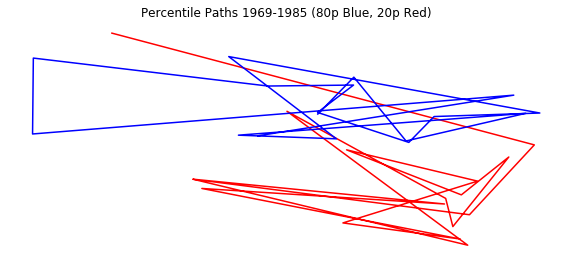

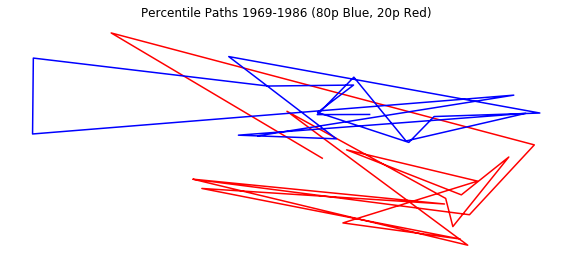

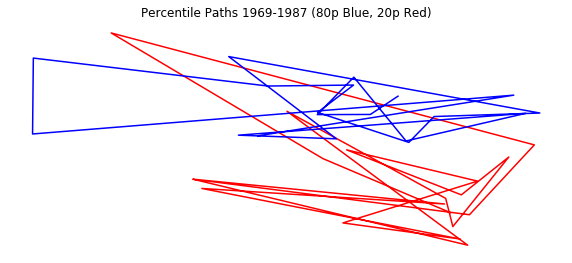

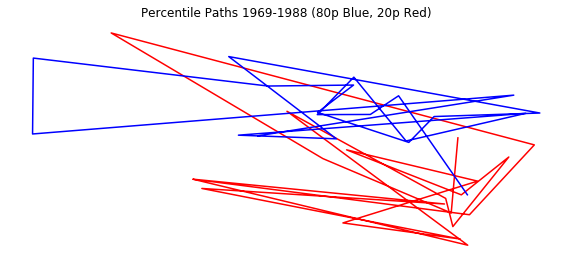

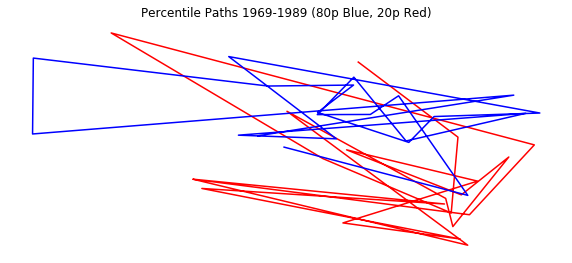

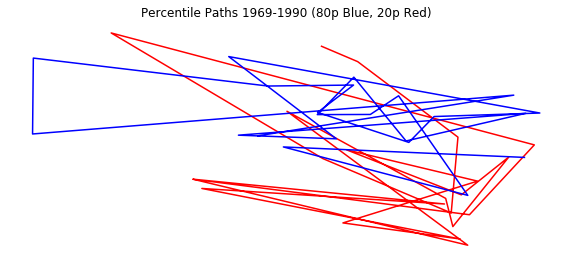

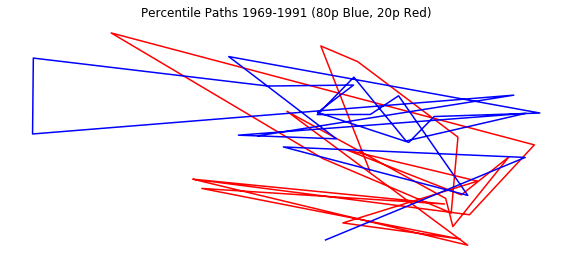

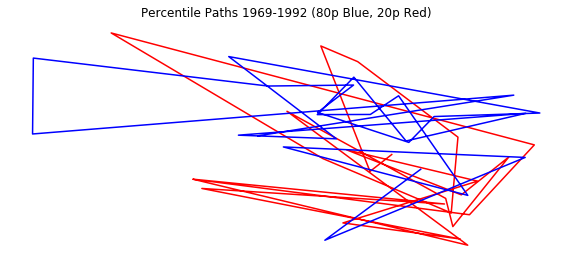

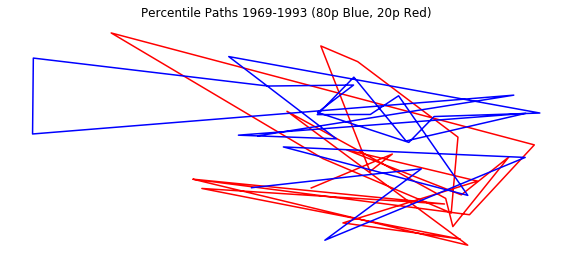

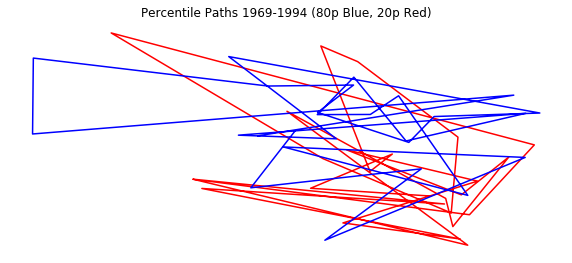

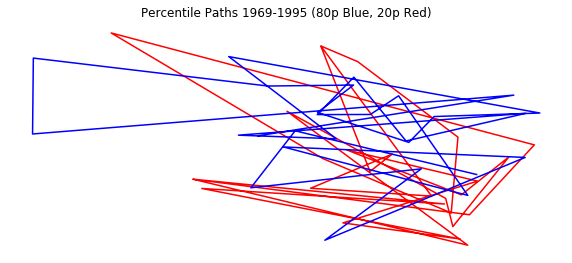

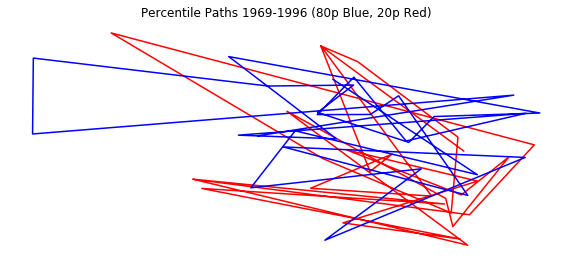

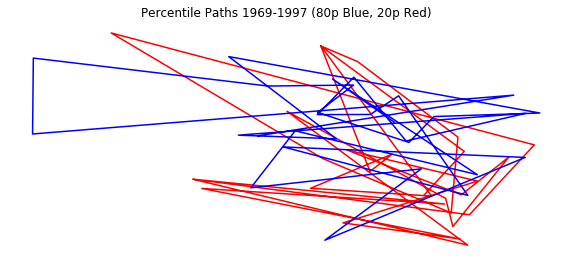

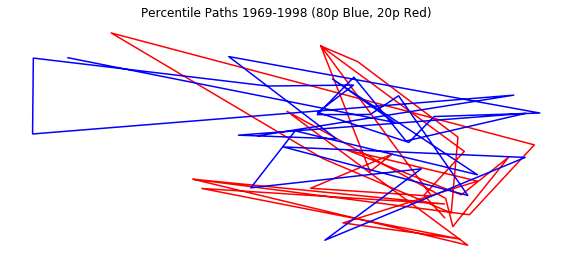

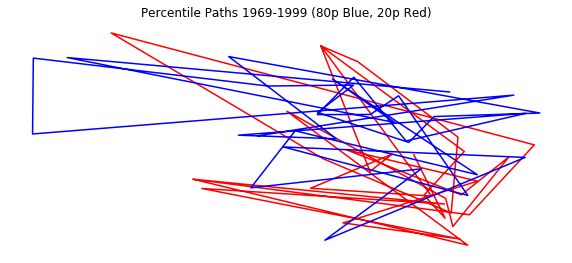

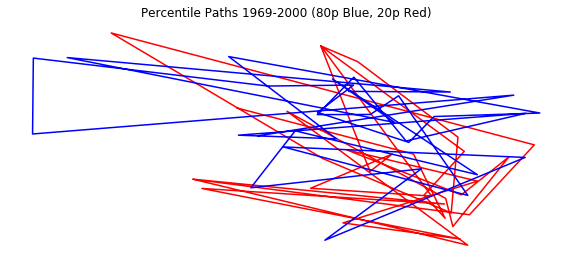

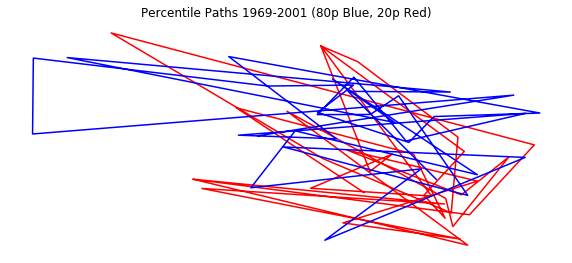

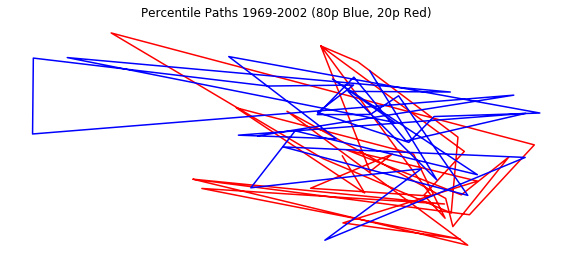

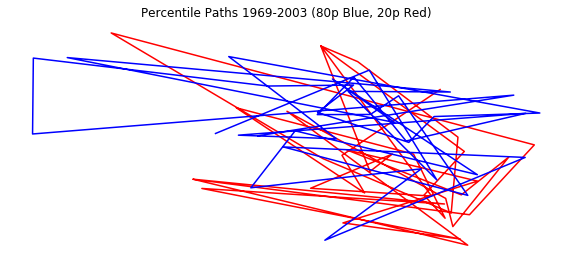

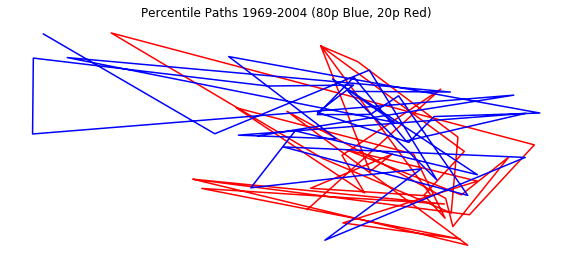

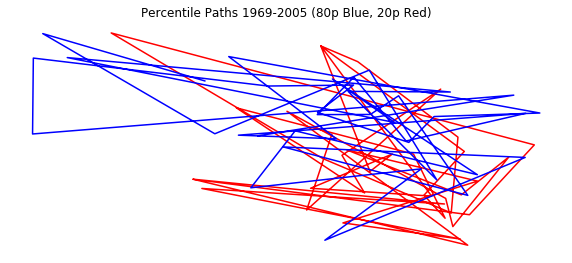

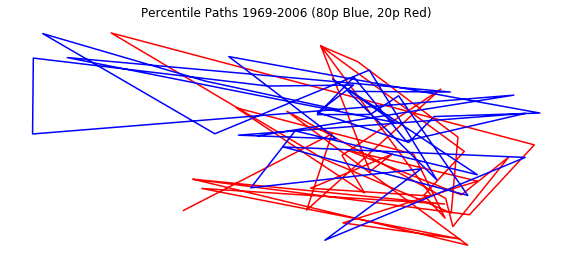

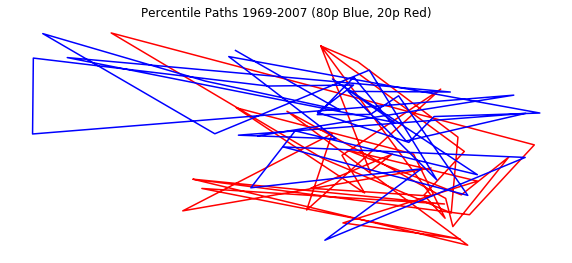

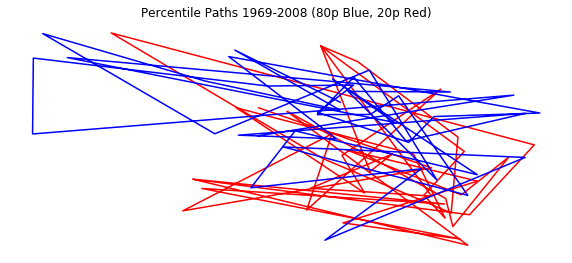

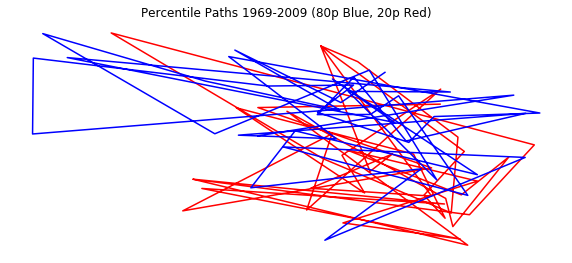

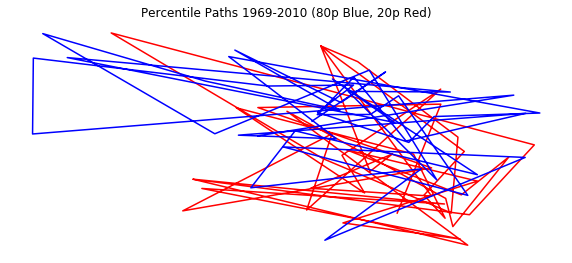

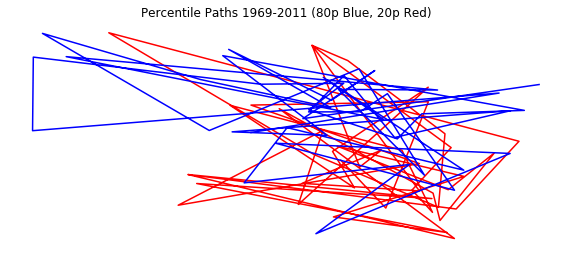

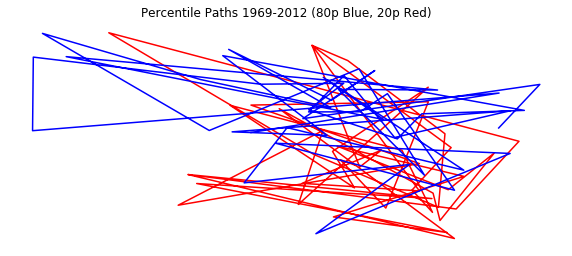

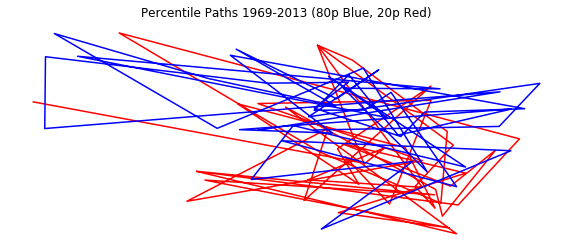

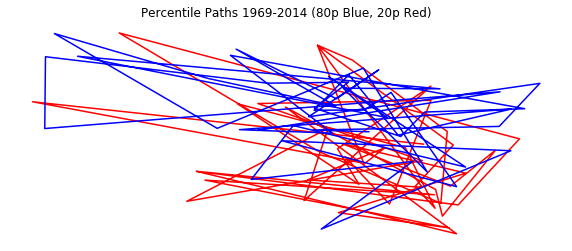

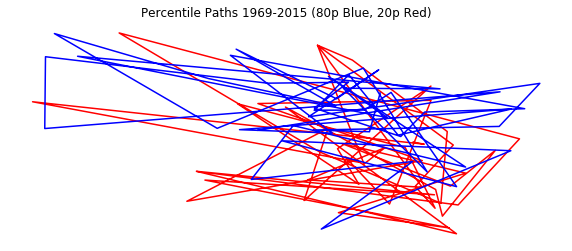

In [231]:
for i in range(2,48):
    #print(0,i)
    fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
    ls20 = geopandas.GeoSeries(LineString(df.loc[idxs[:,0],:].centroid.tolist()[0:i]))
    ls20.plot(ax=ax, color='r', label='20p')
    ls80 = geopandas.GeoSeries(LineString(df.loc[idxs[:,1],:].centroid.tolist()[0:i]))
    ls80.plot(ax=ax, color='b', label='20p')
    
    #ls80.plot(ax=ax, color='b')
    #gdf.plot(ax=ax,edgecolor='gray', alpha=0.2)
    title = 'Percentile Paths 1969-{} (80p Blue, 20p Red)'.format(1969+i-1)
    plt.title(title)
    ax.set_axis_off()

    

## Regional Inequality Decompositions

### Theil

$$T = \sum_{i=1}^n \left( \frac{y_i}{\sum_{i=1}^n y_i} \ln \left[ n \frac{y_i}{\sum_{i=1}^n y_i}\right] \right)$$

This global inequality measure can be decomposed as follows:



$$ T = \sum_{g=1}^{\omega} s_{g} log(\frac{n}{n_g} s_g) + \sum_{g=1}^{\omega} s_g \sum_{i \in g} s_{i,g} log(n_g s_{i,g})$$

$$ \sum_{j=1}^m s_j T_j + \sum_{j=1}^m s_j ln(\frac{y_j}{y})$$

$$ T =  \sum_{j=1}^m s_j ln(\frac{y_j}{y}) + \sum_{j=1}^m s_j (\sum_{i \in \omega_j}  y_i/ y_j ln(n_j y_i/ y_j) )$$

where $s_j = \frac{n_j}{n} \frac{y_j}{y}$ is the share of national income in region $j$.

$$GE(1) = \frac{1}{n} \sum_{i=1}^n \frac{y_i}{\bar{y}} ln (\frac{y_i}{\bar{y}})$$

where $y_i$ is per capita income in economy $i$ and $\bar{y}$ is mean per capita income.

Case against population weighting ([Gluschenko 2018](https://webvpn.ucr.edu/+CSCO+0075676763663A2F2F6A6A6A2E676E6171736261797661722E70627A++/doi/full/10.1080/17421772.2017.1343491))

PySAL does unweighted decompositions as follows:


$$s_g = \frac{\sum_{i \in g} y_i}{\sum_i y_i}$$
with $n_g$ is the number of areas belonging to region $g$. The between regions component is obtained as:

$$B = \iota^{'}\hat{S} \times \log(\hat{n/n_g} \times \hat{S})\iota$$
and $\hat{S}$ is a diagonal matrix of regional shares, and $\iota$ is a unit vector. The within component is taken as the complement: $W = T - B$.

Classic Theil is given as:
$$T = \frac{1}{n} \sum_{i=1}^n \frac{y_i}{\mu} \log(\frac{y_i}{\mu})$$
with $\mu = \frac{1}{n} \sum_{i=1}^n y_i$.



Substituting we have:
$$T = \frac{1}{n} \sum_{i=1}^n \frac{y_i}{\frac{1}{n} \sum_{i=1}^n y_i} \log \left(\frac{y_i}{\frac{1}{n} \sum_{i=1}^n y_i}\right)= \sum_{i=1}^n \frac{y_i}{ \sum_{i=1}^n y_i} \log \left(n \frac{y_i}{ \sum_{i=1}^n y_i} \right)$$



In [ ]:
pci_df.columns

In [ ]:
pandas.unique(pci_df['Region'])

In [ ]:
pci_df.plot(column='Region', categorical=True)

In [ ]:
region_df = pci_df.dissolve(by='STATEFP')

In [ ]:
pandas.unique(region_df.Region)

In [ ]:
pci_df[pci_df.NAME.str.startswith('Boul')]

In [ ]:
region_df.plot(column='Region', categorical=True)

In [ ]:
for region in range(1, 9):
    pci_df[pci_df.Region==region].plot()
    print(region)

In [ ]:
region_names = ["New England",
               'Mideast', 'Great Lakes', 'Plains',
               'Southeast', 'Southwest', 'Rocky Mountain',
                'Far West']

In [ ]:
pci_df.groupby('Region').mean()

In [ ]:
regimes = pci_df['Region']
ys = [str(y) for y in years]

In [ ]:
theil_d = pysal.explore.inequality.theil.TheilD(pci_df[ys].values, regimes)

In [ ]:
theil_d.bg

In [ ]:
res_df['bg'] = theil_d.bg
res_df['wg'] = theil_d.wg

In [ ]:
res_df.plot(subplots=True, figsize=(15,6))

In [ ]:

numpy.random.seed(12345)
theil_ds = pysal.explore.inequality.theil.TheilDSim(pci_df[ys].values, regimes, 999)

In [ ]:
res_df['bg_pvalue'] = theil_ds.bg_pvalue
res_df.plot(subplots=True, figsize=(15,6))

### Intraregional inequality trends

Theil applied to each of the regions.

Plot the eight series

In [ ]:
region_df.plot(column='Region', categorical=True)

In [ ]:
for region in range(1, 9):
    rdf = pci_df[pci_df.Region==region]
    rdf.plot()
    print(region, len(pandas.unique(rdf.STATEFP)))

In [ ]:
theil_ds = pysal.explore.inequality.theil.TheilDSim(rdf[ys].values, rdf.STATEFP, 999)

In [ ]:
len(theil_ds.bg[0])

In [ ]:
theil_ds.bg[0]

In [ ]:
theil_ds.bg_pvalue

In [ ]:
theil_ds.T

In [ ]:
theil_ds.bg/theil_ds.T

In [ ]:
wgp_ds = theil_ds.wg[0]/theil_ds.T

In [ ]:
wgp_dr = theil_d.wg[0]/theil_d.T

In [ ]:
wgp_dr.shape

In [ ]:
res_df.shape

In [ ]:
wgp_ds.shape = (49, 1)
res_df['wgp_ds'] = wgp_ds
wgp_dr.shape = (49, 1)

res_df['wgp_dr'] = wgp_dr

res_df.plot(subplots=True, figsize=(15,6))

In [ ]:
res_df.plot(y=['wgp_ds','wgp_dr'])

In [ ]:
res_df.head()

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.

In [ ]:
import seaborn